In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from pyrcn.echo_state_network import ESNRegressor

structural_mask = pd.read_csv('data/sub-CON01_ses-preop.csv',header=None)
structural_mask = (structural_mask > 0).astype(int)
# sns.heatmap(structural_mask)

In [37]:
# Read time-series from a all subjects into a list of numpy arrays
from os import listdir
import os.path as op
from numpy import genfromtxt

subfiles = [f for f in listdir('data') if op.isfile(op.join('data', f)) and 'Gordon' in f]

sublist = []
for sub in subfiles:
    s = genfromtxt(op.join('data',sub), delimiter=',')
    sublist.append(s)

sub_array = np.stack(sublist, axis=0)


In [38]:
r1i = 111 #index of the first region
r2i = 222 #index of the second region

In [44]:
x = sub_array[:,:,r1i]
y = sub_array[:,:,r2i]

In [67]:
train_len = int(len(x[0]) * 0.6)

X_train = np.array(x[:,:train_len]).T
X_test = np.array(x[:,train_len:]).T
y_train = np.array(y[:,:train_len]).T
y_test = np.array(y[:,train_len:]).T

In [77]:
reg = ESNRegressor(hidden_layer_size=50)

In [78]:
reg.fit(X=X_train, y=y_train)

ESNRegressor(input_to_node=InputToNode(hidden_layer_size=50),
             node_to_node=NodeToNode(hidden_layer_size=50),
             regressor=IncrementalRegression(), requires_sequence=False)

In [79]:
y_pred = reg.predict(X_test)


In [80]:
# correlation
np.corrcoef(y_test, y_pred)[0, 1]

0.7339169058310131

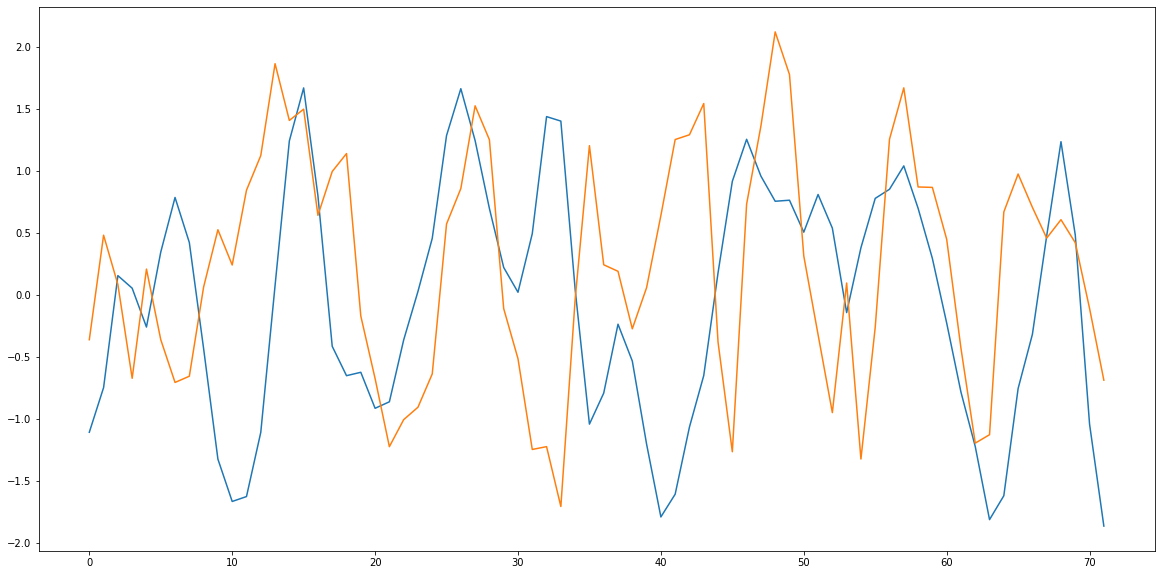

In [76]:
plt.figure(figsize=(20, 10))
plt.plot(y_test[:,0], label='y_test')
plt.plot(y_pred[:,0], label='y_pred')

In [81]:
# correlation on training set
y_pred_train = reg.predict(X_train)
np.corrcoef(y_train, y_pred_train)[0, 1]

-0.5809894026751601

In [89]:
r1i = 14 #index of the first region
r2i = 222 #index of the second region
x = sub_array[:,:,r1i]
y = sub_array[:,:,r2i]
train_len = int(len(x[0]) * 0.6)

X_train = np.array(x[:,:train_len]).T
X_test = np.array(x[:,train_len:]).T
y_train = np.array(y[:,:train_len]).T
y_test = np.array(y[:,train_len:]).T

reg = ESNRegressor(hidden_layer_size=50)

reg.fit(X=X_train, y=y_train)

y_pred = reg.predict(X_test)

# correlation
np.corrcoef(y_test, y_pred)[0, 1]

0.7339169058310131

In [90]:
# correlation on training set
y_pred_train = reg.predict(X_train)
np.corrcoef(y_train, y_pred_train)[0, 1]

-0.5809894026751601